# Intro to CNN

Computer vision is the practice of writing algorithms which can discover patterns in visual data

## What we are going to learn

* working with pizza_steak dataset
* architecture of CNN
* end to end binary image classification
* step in modelling with CNN
* end to end multiclass image classification

## Get the data

the data we are using is from https://www.kaggle.com/dansbecker/food-101, but we modify a bit to use 2 classes

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Dataset'

In [5]:
%cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [ ]:
!ls

 ASLClassification	       group1-shard8of10.bin
 batik_dataset		       group1-shard9of10.bin
 batikology-dataset-main.zip   kaggle.json
 cats_and_dogs_filtered.zip    Manuk
 CK+			       model.json
'CK+ augmented'		      'Murai Batu KOPSI 2021'
 group1-shard10of10.bin        rice-diseases-image-dataset
 group1-shard5of10.bin	      'Sampel Manuk Murai'
 group1-shard6of10.bin	      'SDUMLA Database'
 group1-shard7of10.bin	       tomato_4_classes


In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-09-24 02:21:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 74.125.141.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  46.3MB/s    in 2.3s    

2021-09-24 02:21:48 (46.3 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [ ]:
!ls

 ASLClassification	       kaggle.json
 batik_dataset		       __MACOSX
 batikology-dataset-main.zip   Manuk
 cats_and_dogs_filtered.zip    model.json
 CK+			      'Murai Batu KOPSI 2021'
'CK+ augmented'		       pizza_steak
 group1-shard10of10.bin        pizza_steak.zip
 group1-shard5of10.bin	       rice-diseases-image-dataset
 group1-shard6of10.bin	      'Sampel Manuk Murai'
 group1-shard7of10.bin	      'SDUMLA Database'
 group1-shard8of10.bin	       tomato_4_classes
 group1-shard9of10.bin


## Inspect what the data looks like

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
# walk through pizza steak directory
for dirpath , dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 1 images in pizza_steak
There are 2 directories and 1 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 1 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [ ]:
# the extra file in our directory is '.DS_Store' but its ok
!ls -la pizza_steak

total 15
-rw------- 1 root root 6148 Sep 24 02:21 .DS_Store
drwx------ 4 root root 4096 Sep 24 02:21 test
drwx------ 4 root root 4096 Sep 24 02:21 train


In [ ]:
!rm ./test.txt

In [ ]:
# Another way to find out how many images are in file
len(os.listdir('pizza_steak/train/steak'))

750

#### Visualize our image

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
class_names = class_names[1:]  # remove .DS_store
print(class_names)

['pizza' 'steak']


In [7]:
# visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 384, 3)


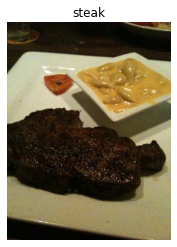

In [8]:
# view random image
img = view_random_image(target_dir ='pizza_steak/train/',
                        target_class = 'steak')

In [7]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[248, 254, 244],
        [249, 255, 245],
        [252, 255, 246],
        ...,
        [138, 143, 139],
        [135, 140, 134],
        [147, 149, 144]],

       [[250, 253, 244],
        [251, 254, 245],
        [252, 255, 246],
        ...,
        [142, 147, 143],
        [140, 145, 139],
        [148, 153, 147]],

       [[250, 253, 242],
        [250, 253, 244],
        [250, 253, 244],
        ...,
        [142, 147, 141],
        [138, 143, 137],
        [142, 147, 141]],

       ...,

       [[213, 173, 148],
        [216, 176, 150],
        [222, 178, 151],
        ...,
        [ 57,  28,  32],
        [ 53,  24,  28],
        [ 50,  21,  23]],

       [[219, 182, 156],
        [223, 186, 160],
        [228, 186, 161],
        ...,
        [ 52,  23,  27],
        [ 50,  21,  25],
        [ 45,  16,  20]],

       [[223, 187, 161],
        [228, 191, 165],
        [233, 193, 167],
        ...,
        [ 47,  16,  2

In [ ]:
img

array([[[ 29,  10,  12],
        [ 32,  13,  15],
        [ 34,  15,  17],
        ...,
        [223, 215, 202],
        [223, 215, 202],
        [223, 215, 202]],

       [[ 27,  11,  12],
        [ 32,  13,  15],
        [ 33,  14,  16],
        ...,
        [224, 216, 203],
        [224, 216, 203],
        [224, 216, 203]],

       [[ 28,  12,  13],
        [ 30,  14,  15],
        [ 31,  15,  16],
        ...,
        [224, 216, 203],
        [225, 217, 204],
        [225, 217, 204]],

       ...,

       [[207, 197, 188],
        [207, 197, 188],
        [206, 196, 187],
        ...,
        [202, 189, 173],
        [201, 188, 172],
        [201, 188, 172]],

       [[207, 197, 188],
        [207, 197, 188],
        [206, 196, 187],
        ...,
        [201, 188, 172],
        [200, 187, 171],
        [200, 187, 171]],

       [[208, 198, 189],
        [207, 197, 188],
        [207, 197, 188],
        ...,
        [200, 187, 171],
        [200, 187, 171],
        [199, 186, 170]]

## remember we needs to normalize the value and get all the pixel values between 0 & 1

In [8]:
img/255

array([[[0.97254902, 0.99607843, 0.95686275],
        [0.97647059, 1.        , 0.96078431],
        [0.98823529, 1.        , 0.96470588],
        ...,
        [0.54117647, 0.56078431, 0.54509804],
        [0.52941176, 0.54901961, 0.5254902 ],
        [0.57647059, 0.58431373, 0.56470588]],

       [[0.98039216, 0.99215686, 0.95686275],
        [0.98431373, 0.99607843, 0.96078431],
        [0.98823529, 1.        , 0.96470588],
        ...,
        [0.55686275, 0.57647059, 0.56078431],
        [0.54901961, 0.56862745, 0.54509804],
        [0.58039216, 0.6       , 0.57647059]],

       [[0.98039216, 0.99215686, 0.94901961],
        [0.98039216, 0.99215686, 0.95686275],
        [0.98039216, 0.99215686, 0.95686275],
        ...,
        [0.55686275, 0.57647059, 0.55294118],
        [0.54117647, 0.56078431, 0.5372549 ],
        [0.55686275, 0.57647059, 0.55294118]],

       ...,

       [[0.83529412, 0.67843137, 0.58039216],
        [0.84705882, 0.69019608, 0.58823529],
        [0.87058824, 0

## Lets go to end to end binary classification

* load images
* preprocess images
* build CNN model
* compile CNN model
* Fitting the model

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/Dataset/pizza_steak/train'
test_dir = '/content/drive/MyDrive/Dataset/pizza_steak/test'

# set the seed
tf.random.set_seed(42)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Import data from directories and turn into bathces
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
# build a CNN model (tiny VGG)
model_1 = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation='relu',
                            input_shape=(224,224,3)),
     tf.keras.layers.Conv2D(10,3, activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
     tf.keras.layers.Conv2D(10,3, activation='relu'),
     tf.keras.layers.Conv2D(10,3, activation='relu'),
     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
model_1.fit(train_data,  
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data= valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 488s 10s/step - loss: 0.5522 - accuracy: 0.7307 - val_loss: 0.4179 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 14s 300ms/step - loss: 0.4177 - accuracy: 0.8120 - val_loss: 0.3315 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 14s 300ms/step - loss: 0.4016 - accuracy: 0.8327 - val_loss: 0.3240 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 14s 302ms/step - loss: 0.3655 - accuracy: 0.8440 - val_loss: 0.3229 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 14s 306ms/step - loss: 0.3243 - accuracy: 0.8667 - val_loss: 0.3414 - val_accuracy: 0.8500


In [12]:
# Check model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

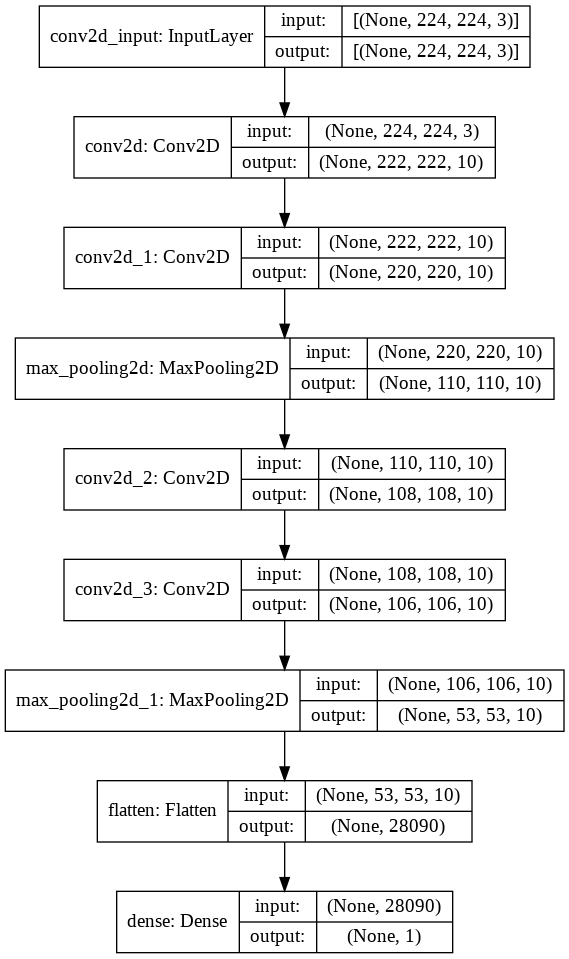

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model_1, show_shapes=True)

## How about we use ANN from previous modul

its will kinda interesting though

In [18]:
# replicate previous model
model_2 = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
model_2.fit(train_data,  
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data= valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 273ms/step - loss: 1.0374 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 13s 269ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 263ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 266ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 264ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


I think our model just guessing around, lets see the summary

In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


woow, despite having higher params ouer model perform worst, lets do the hyperparameter tunning

In [20]:
# replicate previous model
model_3 = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
model_3.fit(train_data,  
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data= valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 276ms/step - loss: 1.8647 - accuracy: 0.6820 - val_loss: 0.4933 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 13s 272ms/step - loss: 1.3210 - accuracy: 0.6653 - val_loss: 0.7287 - val_accuracy: 0.6960
Epoch 3/5
47/47 [==============================] - 13s 271ms/step - loss: 0.6256 - accuracy: 0.7580 - val_loss: 0.5860 - val_accuracy: 0.7220
Epoch 4/5
47/47 [==============================] - 13s 268ms/step - loss: 0.4750 - accuracy: 0.7993 - val_loss: 0.4491 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 13s 271ms/step - loss: 0.5501 - accuracy: 0.7707 - val_loss: 0.5169 - val_accuracy: 0.7540


In [22]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


woow we can improve our model accuracy, but we have hugh params and still nowhere near our CNN model

## Lets break down our binary classification using CNN

Image shape: (512, 512, 3)
Image shape: (382, 512, 3)


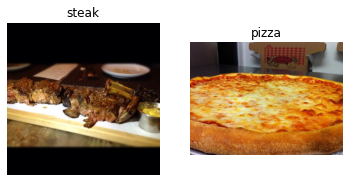

In [24]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

This [CNN explainer website](https://poloclub.github.io/cnn-explainer/) will give us indepth intuition of CNN, I recommend you to play around with this website



In [11]:
# lets build another simple CNN model, but only use Convolution layers
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 935s 19s/step - loss: 1.3240 - accuracy: 0.6480 - val_loss: 0.4781 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 14s 293ms/step - loss: 0.4444 - accuracy: 0.7973 - val_loss: 0.4012 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 14s 293ms/step - loss: 0.3395 - accuracy: 0.8627 - val_loss: 0.3863 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 14s 292ms/step - loss: 0.1748 - accuracy: 0.9433 - val_loss: 0.4183 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 14s 292ms/step - loss: 0.0837 - accuracy: 0.9807 - val_loss: 0.5389 - val_accuracy: 0.8080


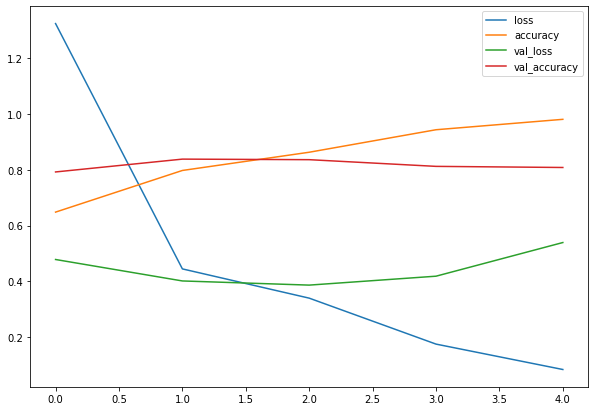

In [12]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [13]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

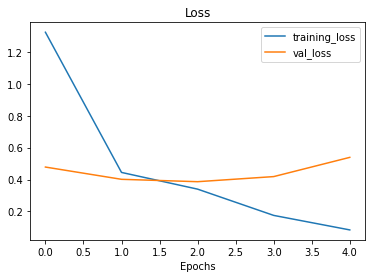

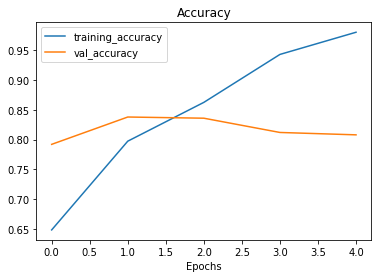

In [14]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [15]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 278ms/step - loss: 0.5868 - accuracy: 0.7047 - val_loss: 0.4571 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 13s 268ms/step - loss: 0.4623 - accuracy: 0.7967 - val_loss: 0.3989 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 13s 270ms/step - loss: 0.4471 - accuracy: 0.7973 - val_loss: 0.3773 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 13s 270ms/step - loss: 0.4251 - accuracy: 0.8213 - val_loss: 0.3560 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 13s 271ms/step - loss: 0.3960 - accuracy: 0.8320 - val_loss: 0.4177 - val_accuracy: 0.8120


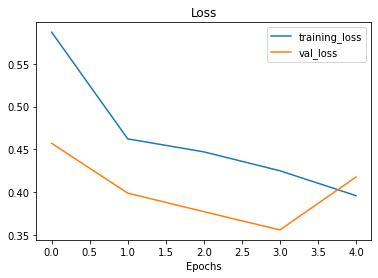

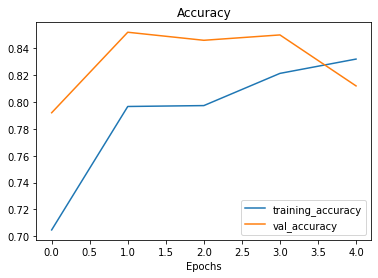

In [16]:
plot_loss_curves(history_5)

In [17]:
# Check out the model architecture
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6760)             

In [18]:
# Check out the model architecture previous model
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_2 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


wuooww, the results of MaxPooling are seen in a major reduction of total trainable parameters (8,861 in `model_5` and 477,431 in `model_4`). And prevent the overfitting problem on `model_4`

## Augmentation

In [20]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [21]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [22]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

(-0.5, 223.5, 223.5, -0.5)

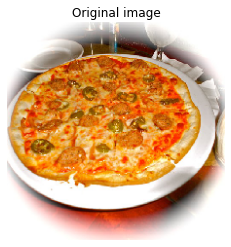

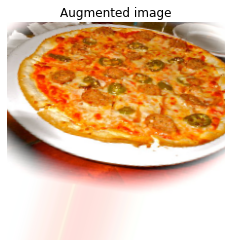

In [27]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [28]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 596ms/step - loss: 0.7129 - accuracy: 0.3820 - val_loss: 0.6899 - val_accuracy: 0.5860
Epoch 2/5
47/47 [==============================] - 28s 594ms/step - loss: 0.6937 - accuracy: 0.5040 - val_loss: 0.6863 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 28s 590ms/step - loss: 0.6849 - accuracy: 0.5833 - val_loss: 0.6439 - val_accuracy: 0.7240
Epoch 4/5
47/47 [==============================] - 28s 589ms/step - loss: 0.6791 - accuracy: 0.6093 - val_loss: 0.6051 - val_accuracy: 0.7180
Epoch 5/5
47/47 [==============================] - 28s 590ms/step - loss: 0.6362 - accuracy: 0.6267 - val_loss: 0.5609 - val_accuracy: 0.7300


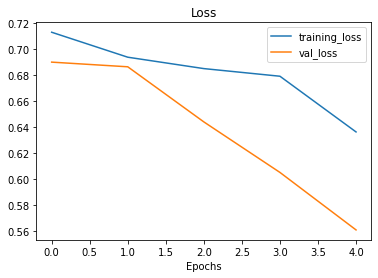

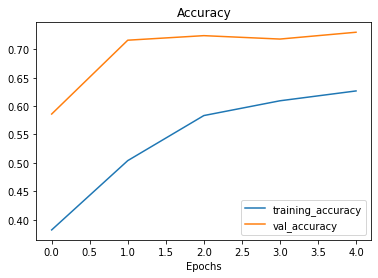

In [29]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

Why didn't our model get very good results on the training set to begin with?

It's because when we created `train_data_augmented` we turned off data shuffling using `shuffle=False` which means our model only sees a batch of a single kind of images at a time. 

In [30]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [31]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 596ms/step - loss: 0.6413 - accuracy: 0.6200 - val_loss: 0.5620 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 28s 588ms/step - loss: 0.5796 - accuracy: 0.6953 - val_loss: 0.6219 - val_accuracy: 0.5920
Epoch 3/5
47/47 [==============================] - 28s 589ms/step - loss: 0.5331 - accuracy: 0.7427 - val_loss: 0.4202 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 28s 586ms/step - loss: 0.5167 - accuracy: 0.7527 - val_loss: 0.4427 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 28s 587ms/step - loss: 0.4878 - accuracy: 0.7813 - val_loss: 0.3377 - val_accuracy: 0.8500


In [33]:
model_7.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)             

We get good accuracy with less parameter than our first model, yeeyyy!!!

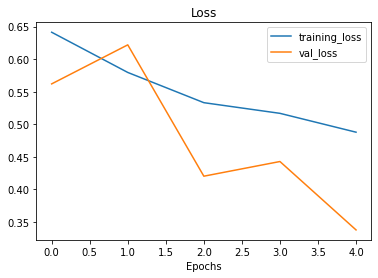

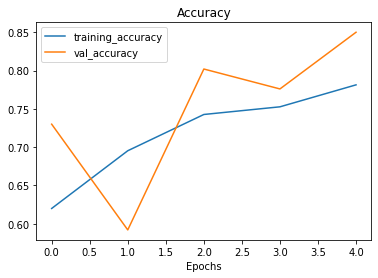

In [32]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

## Lets do prediction to image found on internet

In [36]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [39]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [37]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

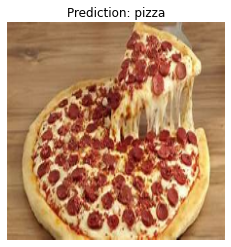

In [40]:
pred_and_plot(model_7, "/content/pizza1.jpg", class_names)

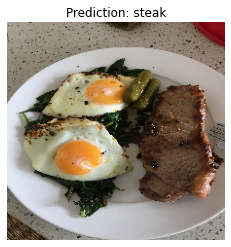

In [46]:
pred_and_plot(model_7, "/content/steak.jpeg", class_names)

## Do yourself

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.
